# EASC 305: Classification 

This script is for the classification lecture. Script and example taken from Trauth, M.H. 2006. Matlab
Recipes for Earth Sciences, Springer-Verlag, Ch. 9.

# Demo 1: Principle Component Analysis (PCA)

In [190]:
%matplotlib notebook

import numpy as np 
import scipy.linalg as LA
import matplotlib.pyplot as plt

np.set_printoptions(precision=5,linewidth=150)

In [163]:
cols = ['amp','pyr','pla','ksp','qtz','cla','flu','sph','gal']
data = np.loadtxt('sediments.txt', skiprows=1)
m, n = data.shape

In [164]:
sample = []

for i in range(m):
    sample.append('Samp.0{}'.format(i))

Element $r_{i,j}$ of the _correlation matrix_ computed from the columns of original sample-measurement matrix: 
$$
r_{i,j} = \frac{ \sum_{i=1}^{N} (x_i - \bar x_i)(y_i - \bar y_i)}{(N-1) s_{xi} s_{yi}}
$$
where: 
  - $x = i^{\rm th} $ column
  - $y = j^{\rm th} $ column

In [165]:
R = np.corrcoef(data,rowvar=False)

<IPython.core.display.Javascript object>


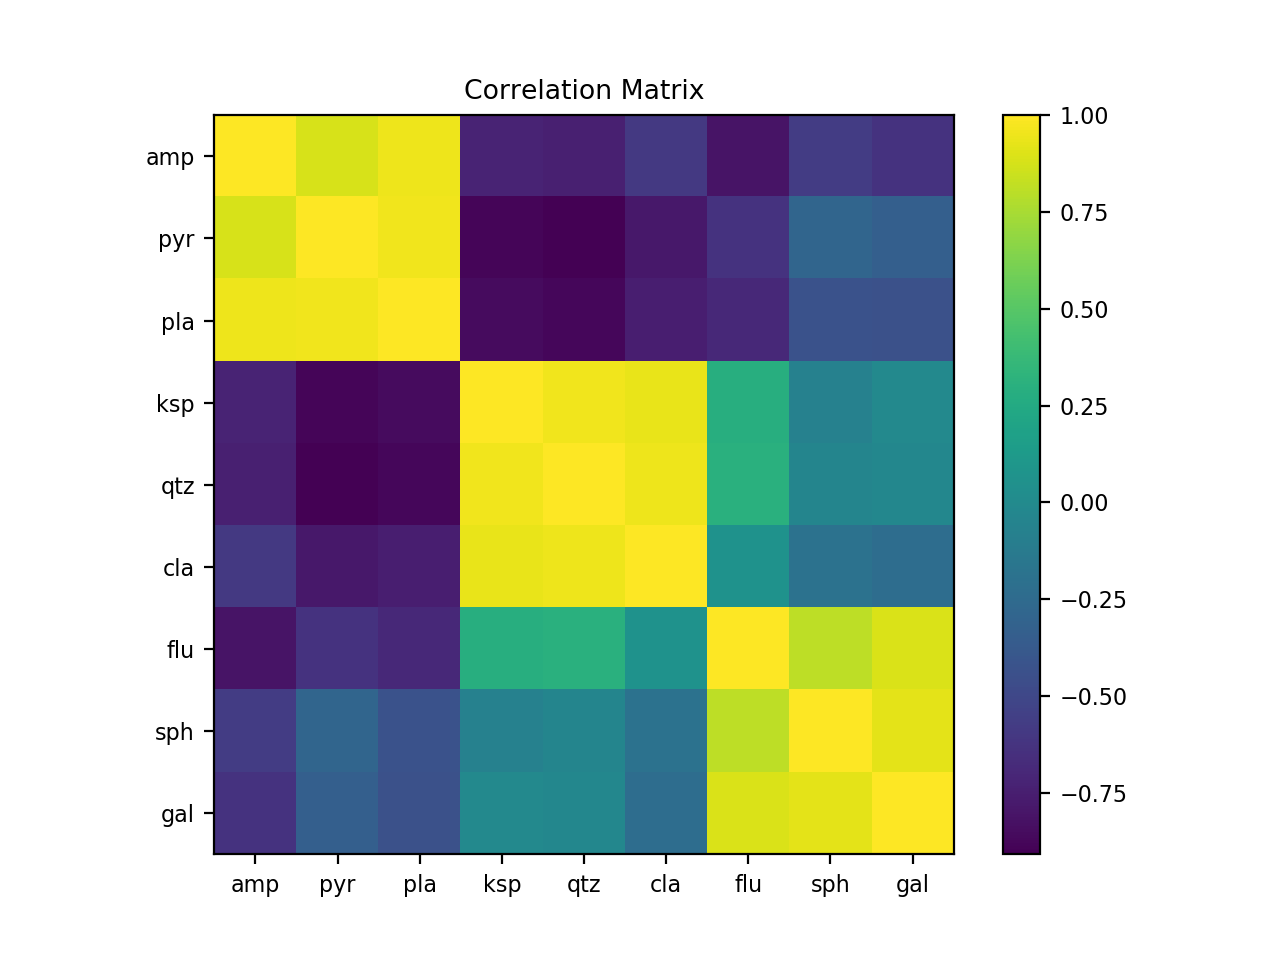

In [166]:
fig, ax = plt.subplots()
im = ax.imshow(R)

ax.set_xticks(np.arange(0,9))
ax.set_xticklabels(cols)

ax.set_yticks(np.arange(0,9))
ax.set_yticklabels(cols)

ax.set_title('Correlation Matrix')
fig.colorbar(im,ax=ax)

Compute the eigenvalues $w$ and eigenvectors $v$ of the correlation matrix $R$: 

In [184]:
w, v = LA.eig(R)
w = np.real_if_close(w)
v = np.real_if_close(v)

In [192]:
for j in range(m-1):
    print( np.sum(v[:,j]**2))

0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999998
1.0000000000000002


Calculate percent variance explained by each principal component:

In [193]:
var_explained = (100*w) / np.sum(w)

Sort eigenvalues and vectors according to eigenvalues

In [194]:
idx = np.argsort(w)[::-1]
w   = w[idx]
v   = v[:,idx]

Convert data to standardized form and compute PCs:

In [195]:
Zd = data - np.ones((m,1))*data.mean(axis=0)
Z  = Zd / (np.ones((m,1)) *data.std( axis=0))
newdata = Z.dot(v)

<IPython.core.display.Javascript object>


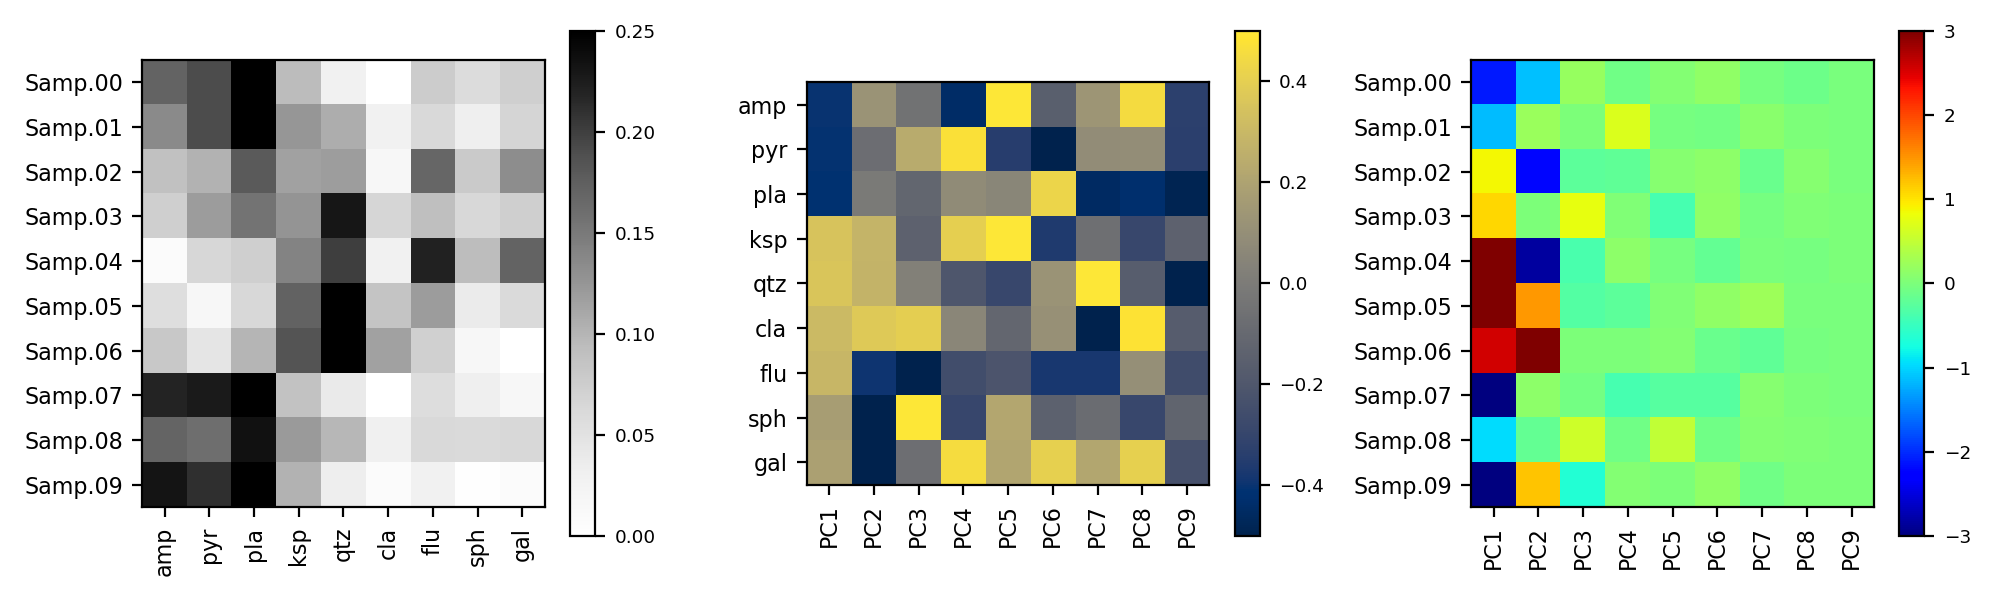

In [196]:
fig, ax = plt.subplots(1,3,figsize=(10,3))

plt.rcParams['font.size'] = '8'

org  = ax[0].imshow(data,cmap='Greys',clim=(0,0.25))
cbar = fig.colorbar(org,ax=ax[0])
cbar.ax.tick_params(labelsize='small')

ax[0].set_yticks(np.arange(0,10))
ax[0].set_yticklabels(sample)

ax[0].set_xticks(np.arange(0,9))
ax[0].set_xticklabels(cols,rotation=90)

load = ax[1].imshow(v, cmap='cividis',clim=(-0.5,0.5))
cbar = fig.colorbar(load,ax=ax[1])
cbar.ax.tick_params(labelsize='small')

ax[1].set_yticks(np.arange(0,9))
ax[1].set_yticklabels(cols)

ax[1].set_xticks(np.arange(0,9))
ax[1].set_xticklabels(['PC{}'.format(i) for i in range(1,11)],rotation=90)

proj = ax[2].imshow(newdata,cmap='jet',clim=(-3,3))
cbar = fig.colorbar(proj,ax=ax[2])
cbar.ax.tick_params(labelsize='small')

ax[2].set_yticks(np.arange(0,10))
ax[2].set_yticklabels(sample)
ax[2].set_xticks(np.arange(0,9))
ax[2].set_xticklabels(['PC{}'.format(i) for i in range(1,11)],rotation=90)

plt.tight_layout()

<IPython.core.display.Javascript object>


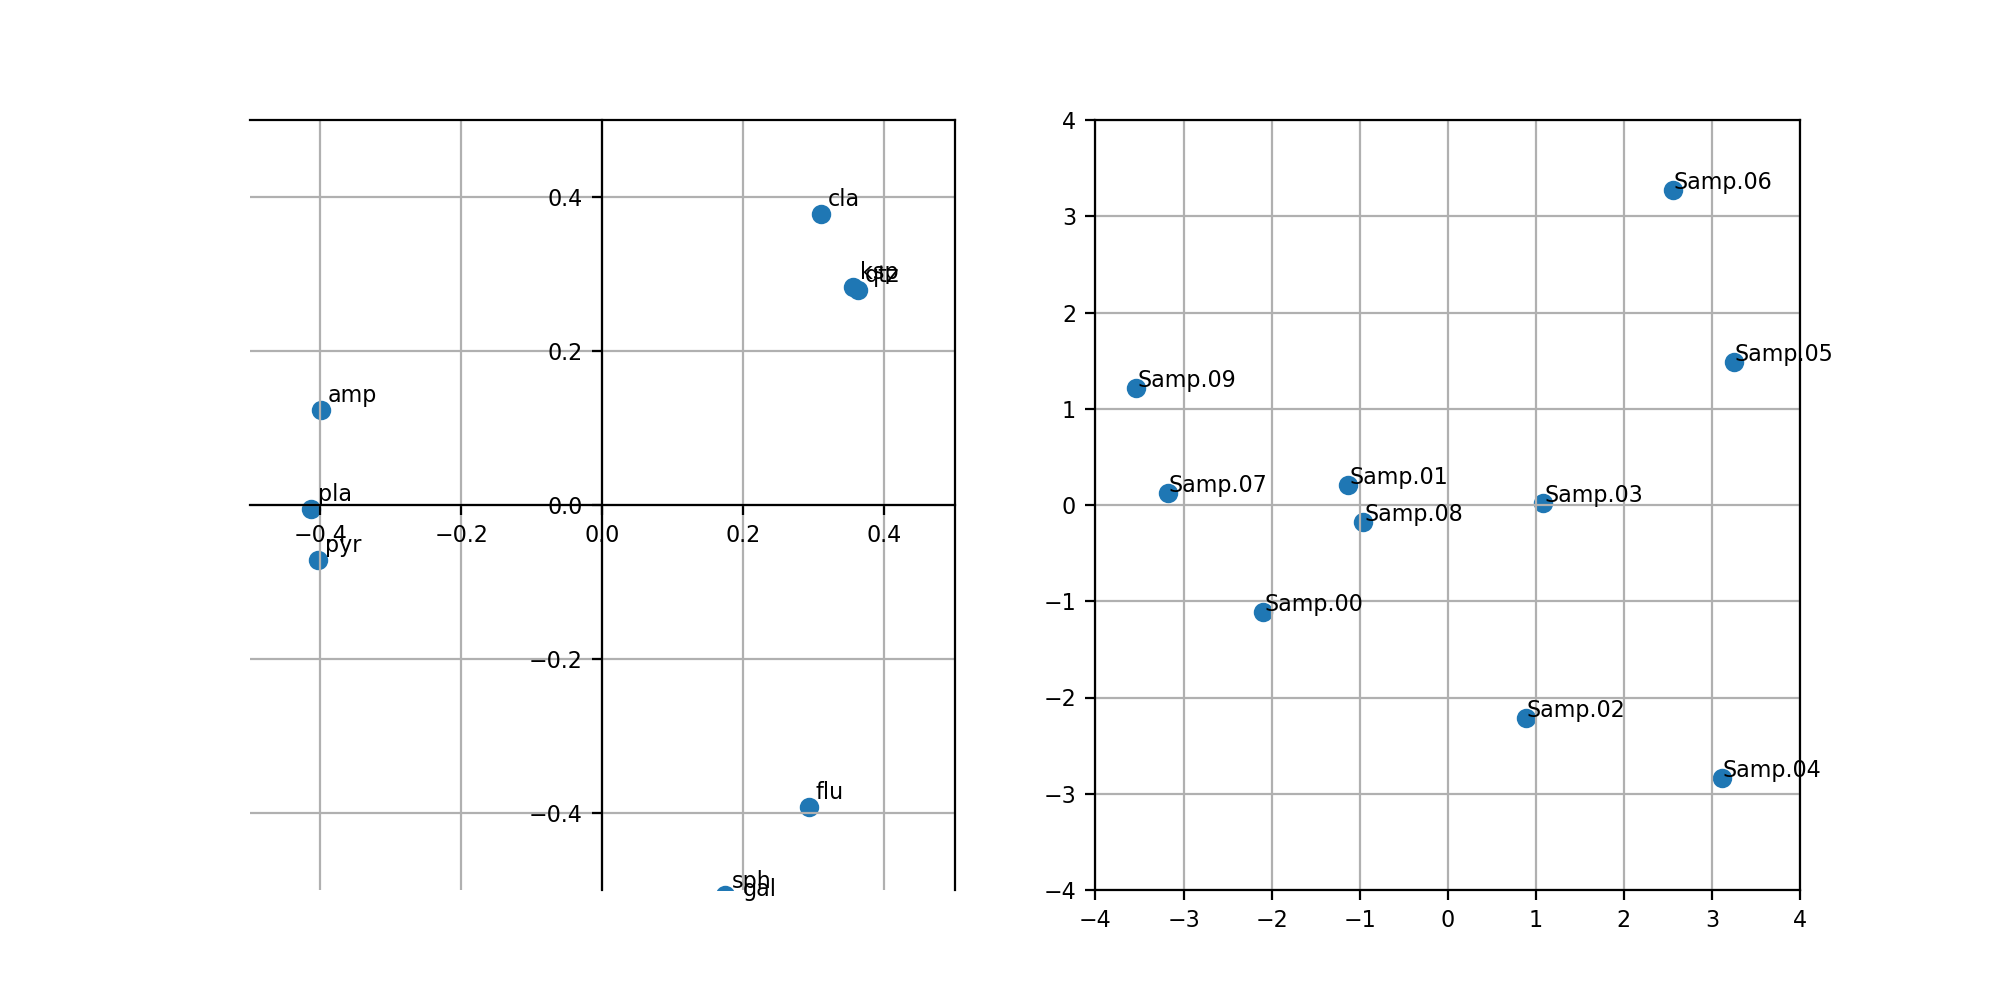

In [213]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].scatter(v[:,0],v[:,1])
ax[0].set_ylim(-0.5, 0.5)
ax[0].set_xlim(-0.5, 0.5)
# ax[0].spines['right'].set_color('none')
# ax[0].spines['top'].set_color('none')
# ax[0].xaxis.set_ticks_position('bottom')
ax[0].spines['bottom'].set_position(('data',0))
# ax[0].yaxis.set_ticks_position('left')
ax[0].spines['left'].set_position(('data',0))
ax[0].grid()

for i in range(v.shape[0]):
    ax[0].text(v[i,0]+0.01,v[i,1]+0.01,cols[i])


ax[1].scatter(newdata[:,0],newdata[:,1])
ax[1].set_ylim(-4.0, 4.0)
ax[1].set_xlim(-4.0, 4.0)
ax[1].grid()

for i in range(newdata.shape[0]):
    ax[1].text(newdata[i,0]+0.01,newdata[i,1]+0.01,sample[i])

# Demo 2: Principal stresses and coordinates

In [224]:
stress = np.array([[0.0,-1.0e6],[-1.0e6,0.0]])

w, v = np.linalg.eig(stress)

In [227]:
v

array([[ 0.70711,  0.70711],
       [-0.70711,  0.70711]])

In [228]:
stress

array([[       0., -1000000.],
       [-1000000.,        0.]])